In [1]:
import os
import sys
import glob
import pydicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def displayDICOMimage(DICOMobj):
    plt.figure(1)
    plt.imshow(DICOMobj.pixel_array,plt.cm.gray)
    plt.show()

def getenv():
    """
    Requires sys and os modules:
    import sys
    import os
    """
    if sys.platform == 'win32':
        env_home = 'HOMEPATH'
    elif (sys.platform == 'darwin') | (sys.platform == 'linux'):
        env_home = 'HOME'
    HOMEPATH = os.getenv(env_home)
    
    return HOMEPATH

def check_path_exist(path, file=False):
    """
    Flag FILE indicates the path contains a file name (FLAG=TRUE) or the path only points to a folder (FLAG=FALSE (Default))
    """
    if file:
        is_path = os.path.isfile(path)
    else:
        is_path = os.path.isdir(path)

    print(f'{"OK:" if is_path else "ERROR:"} Path to {"file" if file else "folder"} {path} does{"" if is_path else " NOT"} exist')

    return is_path

In [6]:
HOMEPATH = getenv()
DATAPATH = os.path.join(HOMEPATH, 'Data', 'fMRIBreastData', 'rawS3')

# Check whether the DATAPATH route exists or not:
_ = check_path_exist(DATAPATH)

OK: Path to folder \Users\joseu\Data\fMRIBreastData\rawS3 does exist


In [7]:
FEXT = 'dcm'
dcmlist = glob.glob(os.path.join(DATAPATH,f'*.{FEXT}'))
print(f'There are {len(dcmlist)} files in {DATAPATH}')

There are 12600 files in \Users\joseu\Data\fMRIBreastData\rawS3


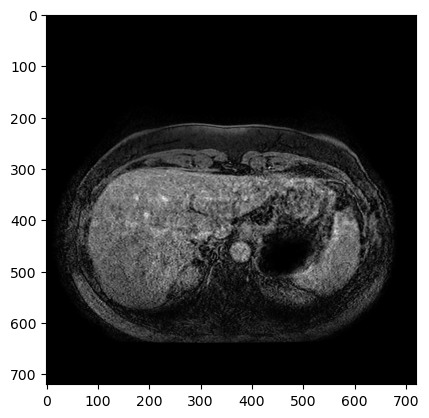

In [8]:
ds = pydicom.dcmread(dcmlist[0])
displayDICOMimage(ds)

In [24]:
Tag2proc = {'SliceLocation':{'hex': [0x00201041],
                             'type': 'float32'
                            },
            'InstanceNumber':{'hex': [0x00200013],
                              'type': 'int'
                             },
            'PatientName': {'hex': [0x00100010],
                            'type': 'string'
                            },
            'PatientID': {'hex': [0x0010020],
                          'type': 'string'
                         },
            'ScanOptions': {'hex': [0x00180022],
                            'type': 'decimal'
                            },
            'SliceThickness': {'hex': [0x00180050],
                               'type': 'float32'
                               },
            'RepetitionTime': {'hex': [0x00180080],
                               'type': 'float32'
                               },
            'EchoTime': {'hex': [0x00180081],
                         'type': 'float32'
                         },
            'FlipAngle': {'hex': [0x00181314],
                          'type': 'float32'
                          }
           }

ImgZpos = []
for dcm in dcmlist:
    ds = pydicom.dcmread(dcm,stop_before_pixels=True)
    newrow = []
    for tagName, tagValue in Tag2proc.items():
        try:
            newrow.append(ds[tagName].value)
        except:
            print(f'Attribute {tagName} does not exist, skipping it...')

    ImgZpos.append(newrow)

In [22]:
zPos = pd.DataFrame(ImgZpos, columns=list(Tag2proc.keys())).astype({'PatientName':'string', 'PatientID': 'string'})#, dtype=[str, int, float])
zPos.sort_values(by=['InstanceNumber'], inplace=True)
zPos['DeltaZ'] = zPos['SliceLocation'].diff()
zPos.head(n=10)

,SliceLocation,InstanceNumber,PatientName,PatientID,ScanOptions,SliceThickness,RepetitionTime,EchoTime,FlipAngle,DeltaZ
419,69.330399,1,RICE001,RICE001,FS,2.0,4.6571,2.304,10.0,NaN
12389,72.026283,1,GL post treatment,ANON99397,FS,3.0,5.2000,2.501,10.0,2.695885
8653,83.809860,1,JB post TREATMENT,ANON18218,FS,3.0,5.2000,2.501,10.0,11.783577
6677,79.150040,1,CR Post treatment,ANON68760,FS,2.0,4.6571,2.304,10.0,-4.659821
10794,109.669601,1,NE Post TREATMENT motion corrected,ANON89073,FS,1.0,4.6571,2.304,10.0,30.519562
10946,109.669601,1,NE Post TREATMENT motion corrected,ANON89073,FS,1.0,4.6571,2.304,10.0,0.000000
4538,109.669601,1,NE Post TREATMENT motion corrected,ANON89073,FS,1.0,4.6571,2.304,10.0,0.000000
12120,69.330399,1,NE Post TREATMENT,ANON89073,FS,2.0,4.6571,2.304,10.0,-40.339203
1255,109.669601,1,NE Post TREATMENT motion corrected,ANON89073,FS,1.0,4.6571,2.304,10.0,40.339203
11967,78.168083,1,RICE001,RICE001,FS,2.0,4.6571,2.304,10.0,-31.501518


In [80]:
a = list(zPos.PatientName.unique())
a.sort()
a

AttributeError: 'list' object has no attribute 'lower'

In [77]:
for name in a:
    print(f'{name} (ID: {zPos[zPos["PatientName"]==name]["PatientID"].unique()[0]})')

CR Post treatment (ID: ANON68760)
CR Pre treatment (ID: ANON68760)
DC  post TREATMENssT (ID: ANON97378)
DC Pre TREATMENT (ID: ANON97378)
EilB Post TREATMENT (ID: ANON98269)
EilB Pre TREATMENT (ID: ANON98269)
GL post treatment (ID: ANON99397)
JB post TREATMENT (ID: ANON18218)
JB pre TREATMENT (ID: ANON18218)
NE Post TREATMENT (ID: ANON89073)
NE Post TREATMENT motion corrected (ID: ANON89073)
NE Pre TREATMENT (ID: ANON89073)
RICE001 (ID: RICE001)
